# Who are the hosts and what are their listing behaviors?

## Are there super hosts or hosts with a disproportionately high number of listings?

# This script contains the following:
### 1. Importing libraries and data
### 2. Cleaning and wrangling of data
### 3. Calculating the host with the highest listings
### 4. Visualization

# 1. Importing libraries and data

In [87]:
# import libraries and data
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans # Here is where you import the k-means algorithm from scikit-learn.
import pylab as pl # PyLab is a convenience module that bulk imports matplotlib.
import folium
from IPython.display import IFrame
from folium.plugins import MarkerCluster
from pandas.plotting import parallel_coordinates

In [88]:
# This option ensures the graphs you create are displayed in your notebook without the need to "call" them specifically.

%matplotlib inline

In [89]:
# import the cvs file
path = r'/Users/fatemehshahvirdi/Work-Related/Data Analysis/Data Immersion/Achievement 6/Rome & Sydney Analysis/O2 Data'
df_rome = pd.read_csv(os.path.join(path, 'Prepared', 'rome_listings_june_cleaned-3.csv'), index_col=False)

# 2. Cleaning and wrangling of data

In [90]:
df_rome.head()

,Unnamed: 0,id,host_id,place_name,rating,num_bedroom,num_bed,baths,neighborhood,latitude,longitude,room_type,price,min_nights,num_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,num_reviews_last_12m
0,0,2737,3047,Place to stay in Rome,4.80,1.0,1.0,1.5 baths,VIII Appia Antica,41.871360,12.482150,Private room,50,7,7,2015-05-28 00:00:00,0.07,6,358,0
1,1,181189,868477,Bed and breakfast in Rome,4.72,1.0,1.0,1 private bath,I Centro Storico,41.909630,12.456030,Hotel room,100,3,147,2023-06-05 00:00:00,1.03,8,175,6
2,2,11834,44552,Rental unit in Rome,4.80,1.0,1.0,1 bath,I Centro Storico,41.895447,12.491181,Entire home/apt,105,2,191,2023-06-02 00:00:00,1.30,1,246,44
3,3,49240,224479,Condo in Rome,4.69,2.0,5.0,1.5 baths,I Centro Storico,41.897380,12.476000,Entire home/apt,294,2,70,2023-04-11 00:00:00,0.46,2,151,32
4,4,181747,871063,Rental unit in Rome,4.56,2.0,3.0,2 baths,I Centro Storico,41.901830,12.503970,Entire home/apt,228,2,85,2023-06-09 00:00:00,0.63,2,329,42


In [91]:
# remove the 'unnamed' column
df_rome = df_rome.loc[:, ~df_rome_june.columns.str.contains('Unnamed: 0')]

In [92]:
df_rome.head()

,id,host_id,place_name,rating,num_bedroom,num_bed,baths,neighborhood,latitude,longitude,room_type,price,min_nights,num_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,num_reviews_last_12m
0,2737,3047,Place to stay in Rome,4.80,1.0,1.0,1.5 baths,VIII Appia Antica,41.871360,12.482150,Private room,50,7,7,2015-05-28 00:00:00,0.07,6,358,0
1,181189,868477,Bed and breakfast in Rome,4.72,1.0,1.0,1 private bath,I Centro Storico,41.909630,12.456030,Hotel room,100,3,147,2023-06-05 00:00:00,1.03,8,175,6
2,11834,44552,Rental unit in Rome,4.80,1.0,1.0,1 bath,I Centro Storico,41.895447,12.491181,Entire home/apt,105,2,191,2023-06-02 00:00:00,1.30,1,246,44
3,49240,224479,Condo in Rome,4.69,2.0,5.0,1.5 baths,I Centro Storico,41.897380,12.476000,Entire home/apt,294,2,70,2023-04-11 00:00:00,0.46,2,151,32
4,181747,871063,Rental unit in Rome,4.56,2.0,3.0,2 baths,I Centro Storico,41.901830,12.503970,Entire home/apt,228,2,85,2023-06-09 00:00:00,0.63,2,329,42


In [93]:
df_rome.shape

(19023, 19)

# 3. Calculating the host with the highest listings

In [94]:
df_rome.columns

Index(['id', 'host_id', 'place_name', 'rating', 'num_bedroom', 'num_bed',
       'baths', 'neighborhood', 'latitude', 'longitude', 'room_type', 'price',
       'min_nights', 'num_reviews', 'last_review', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365',
       'num_reviews_last_12m'],
      dtype='object')

In [133]:
# Find the host with the highest number of listings using calculated_host_listings_count
max_listings_host_id = df_rome.groupby('host_id')['calculated_host_listings_count'].max().idxmax()
max_listings_host = df_rome[df_rome['host_id'] == max_listings_host_id].iloc[0]

print(f"Host with the highest listings: {max_listings_host_id}")
print(f"Number of listings: {max_listings_host['calculated_host_listings_count']}")

# Get all listings of the host with the highest listings
host_listings = df_rome[df_rome['host_id'] == max_listings_host_id]

print(f"Listings for host {max_listings_host_id}:")
print(host_listings[['place_name', 'rating','latitude', 'longitude', 'num_reviews','last_review','neighborhood', 'price']])

Host with the highest listings: 63191555
Number of listings: 68
Listings for host 63191555:
                place_name  rating   latitude  longitude  num_reviews  \
12972         Home in Rome    4.25  41.906900  12.499130            4   
12973         Home in Rome    4.38  41.906770  12.497920            8   
12974         Home in Rome    4.86  41.907120  12.497310           22   
12977         Home in Rome    4.00  41.906870  12.499290            5   
12979         Home in Rome    4.25  41.908310  12.499300            4   
12982         Home in Rome    4.67  41.906930  12.499330            3   
12988         Home in Rome    4.63  41.908240  12.499230            8   
12992         Home in Rome    4.88  41.909020  12.497420           16   
12993         Home in Rome    4.75  41.908700  12.497950           20   
12995         Home in Rome    4.33  41.907080  12.498880            6   
12999         Home in Rome    5.00  41.908790  12.497970            5   
13001         Home in Rome    4.

In [135]:
# Find the top 5 hosts with the highest number of listings using calculated_host_listings_count
top_hosts = df_rome.groupby('host_id')['calculated_host_listings_count'].max().nlargest(5)
top_hosts_ids = top_hosts.index

print("Top 5 hosts with the highest listings:")
for i, (host_id, listings_count) in enumerate(top_hosts.items(), start=1):
    print(f"{i}. Host ID: {host_id}, Number of listings: {listings_count}")

# Get all listings for each of the top 5 hosts
for host_id in top_hosts_ids:
    host_listings = df_rome[df_rome['host_id'] == host_id]
    print(f"\nListings for host {host_id}:")
    print(host_listings[['place_name', 'rating', 'latitude', 'longitude', 'num_reviews', 'last_review', 'neighborhood', 'price']])

Top 5 hosts with the highest listings:
1. Host ID: 63191555, Number of listings: 68
2. Host ID: 8973851, Number of listings: 58
3. Host ID: 2405376, Number of listings: 54
4. Host ID: 1107433, Number of listings: 53
5. Host ID: 316068, Number of listings: 50

Listings for host 63191555:
                place_name  rating   latitude  longitude  num_reviews  \
12972         Home in Rome    4.25  41.906900  12.499130            4   
12973         Home in Rome    4.38  41.906770  12.497920            8   
12974         Home in Rome    4.86  41.907120  12.497310           22   
12977         Home in Rome    4.00  41.906870  12.499290            5   
12979         Home in Rome    4.25  41.908310  12.499300            4   
12982         Home in Rome    4.67  41.906930  12.499330            3   
12988         Home in Rome    4.63  41.908240  12.499230            8   
12992         Home in Rome    4.88  41.909020  12.497420           16   
12993         Home in Rome    4.75  41.908700  12.49795

In [137]:
top_hosts.head()

host_id
63191555    68
8973851     58
2405376     54
1107433     53
316068      50
Name: calculated_host_listings_count, dtype: int64

## The first host with the highest listing number is the host with the host_id: 63191555 which has 68 listings
### Here are the top 5 hosts:
### 63191555    68
### 8973851     58
### 2405376     54
### 1107433     53
### 316068      50

# 4. Visualization

In [59]:
# Create a folium map centered at the mean latitude and longitude of the listings
map_center = [df_rome['latitude'].mean(), df_rome['longitude'].mean()]
mymap = folium.Map(location=map_center, zoom_start=12)

# Add markers for each listing on the map
for index, row in host_listings.iterrows():
    folium.Marker([row['latitude'], row['longitude']], popup=row['place_name']).add_to(mymap)

# Save the map as HTML file
map_filename = 'listings_map.html'
mymap.save(map_filename)

# Display the map within the Jupyter Notebook using IFrame
IFrame(map_filename, width=800, height=600)

## Listings of the top hhost are spread in the city

In [68]:
# Define colors for each host
colors = ['red', 'blue', 'green', 'orange', 'purple']

# Sort the DataFrame by calculated_host_listings_count in descending order
top_hosts = df_rome.groupby('host_id')['calculated_host_listings_count'].sum().reset_index()
top_hosts = top_hosts.sort_values(by='calculated_host_listings_count', ascending=False)

# Select the top 5 hosts
top_5_hosts = top_hosts.head(5)

# Create a folium map centered at the mean latitude and longitude of the listings
map_center = [df_rome['latitude'].mean(), df_rome['longitude'].mean()]
mymap = folium.Map(location=map_center, zoom_start=12)

# Add markers for each listing of the top 5 hosts on the map with different colors
for idx, (host_id, color) in enumerate(zip(top_5_hosts['host_id'], colors)):
    host_listings = df_rome[df_rome['host_id'] == host_id]
    for index, row in host_listings.iterrows():
        folium.Marker([row['latitude'], row['longitude']], popup=row['place_name'], icon=folium.Icon(color=color)).add_to(mymap)

# Add legend
legend_html = """
     <div style="position: fixed; 
                 bottom: 50px; left: 50px; width: 150px; height: 130px; 
                 border:2px solid grey; z-index:9999; background-color:white;
                 opacity: 0.9;
                 ">
     &nbsp; <b>Top Hosts</b> <br>
     &nbsp; <i class="fa fa-map-marker fa-2x" style="color:red"></i> &nbsp; Top Host 1 <br>
     &nbsp; <i class="fa fa-map-marker fa-2x" style="color:blue"></i> &nbsp; Top Host 2 <br>
     &nbsp; <i class="fa fa-map-marker fa-2x" style="color:green"></i> &nbsp; Top Host 3 <br>
     &nbsp; <i class="fa fa-map-marker fa-2x" style="color:orange"></i> &nbsp; Top Host 4 <br>
     &nbsp; <i class="fa fa-map-marker fa-2x" style="color:purple"></i> &nbsp; Top Host 5 <br>
     </div>
     """

mymap.get_root().html.add_child(folium.Element(legend_html))

# Save the map as HTML file
map_filename = 'top_5_hosts_map.html'
mymap.save(map_filename)

# Display the map within the Jupyter Notebook using IFrame
IFrame(map_filename, width=800, height=600)

## Listings of the 5top hosts are spread in the city and it is possible that they are businesses

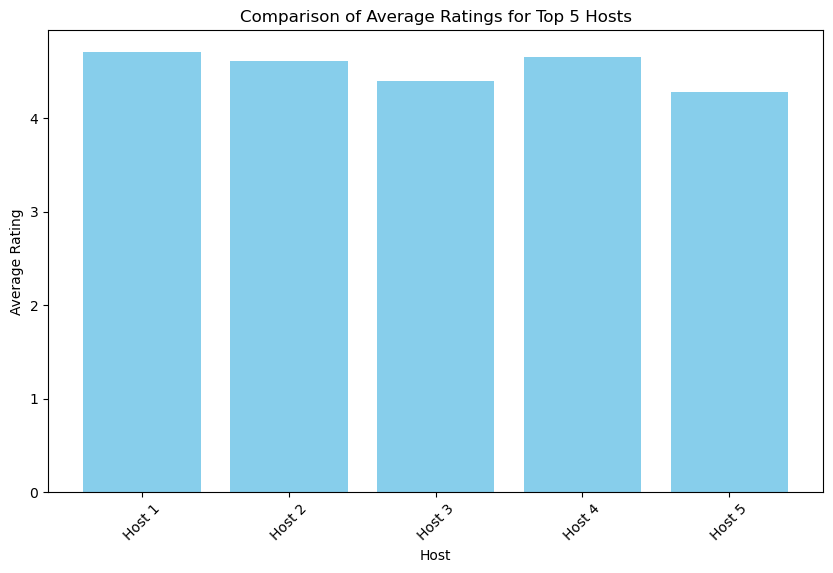

In [80]:
top_5_hosts = df_rome.groupby('host_id')['calculated_host_listings_count'].sum().nlargest(5).index

# Filter the DataFrame to include only listings from the top 5 hosts
top_5_listings = df_rome[df_rome['host_id'].isin(top_5_hosts)]

# Compare their ratings visually using a bar plot
plt.figure(figsize=(10, 6))
top_5_ratings = top_5_listings.groupby('host_id')['rating'].mean()
plt.bar([f'Host {i}' for i in range(1, 6)], top_5_ratings, color='skyblue')
plt.xlabel('Host')
plt.ylabel('Average Rating')
plt.title('Comparison of Average Ratings for Top 5 Hosts')
plt.xticks(rotation=45)
plt.show()

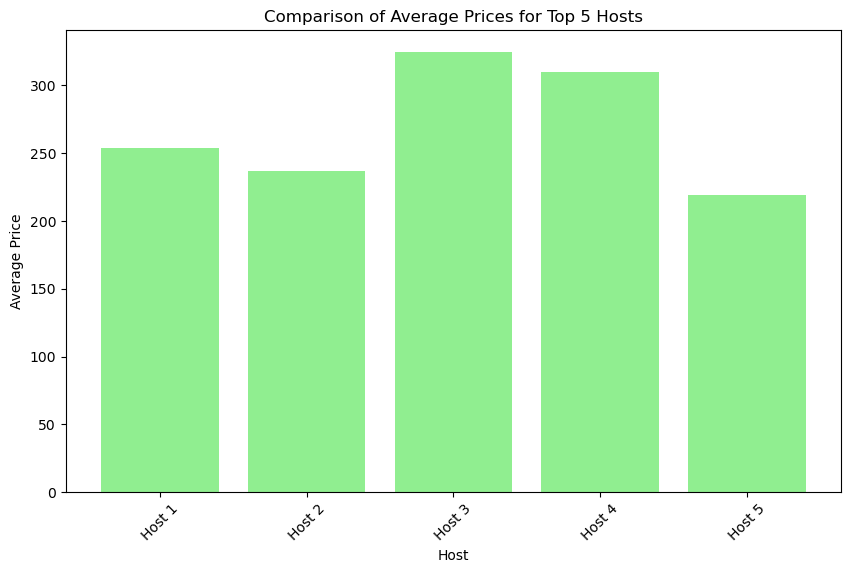

In [79]:
# Compare their prices visually using a bar plot
plt.figure(figsize=(10, 6))
top_5_prices = top_5_listings.groupby('host_id')['price'].mean()
plt.bar([f'Host {i}' for i in range(1, 6)], top_5_prices, color='lightgreen')
plt.xlabel('Host')
plt.ylabel('Average Price')
plt.title('Comparison of Average Prices for Top 5 Hosts')
plt.xticks(rotation=45)
plt.show()

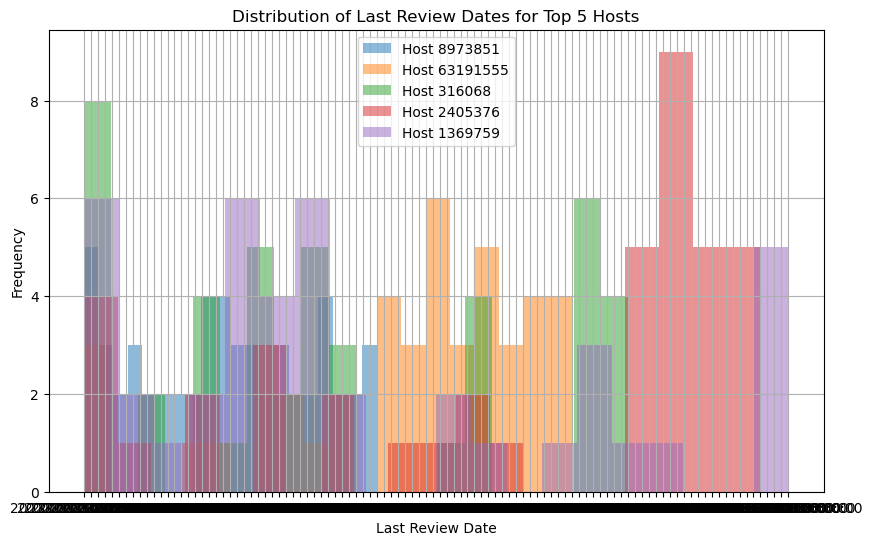

In [75]:
# Compare their 'last_review' dates visually using a histogram
plt.figure(figsize=(10, 6))
for host_id in top_5_hosts:
    top_5_listings[top_5_listings['host_id'] == host_id]['last_review'].hist(alpha=0.5, bins=20, label=f'Host {host_id}')
plt.xlabel('Last Review Date')
plt.ylabel('Frequency')
plt.title('Distribution of Last Review Dates for Top 5 Hosts')
plt.legend()
plt.show()

/var/folders/hq/_gnsfjyd47q9z3ll9llqlfpw0000gn/T/ipykernel_66962/3168619963.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_5_listings['last_review'] = pd.to_datetime(top_5_listings['last_review'])
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/l

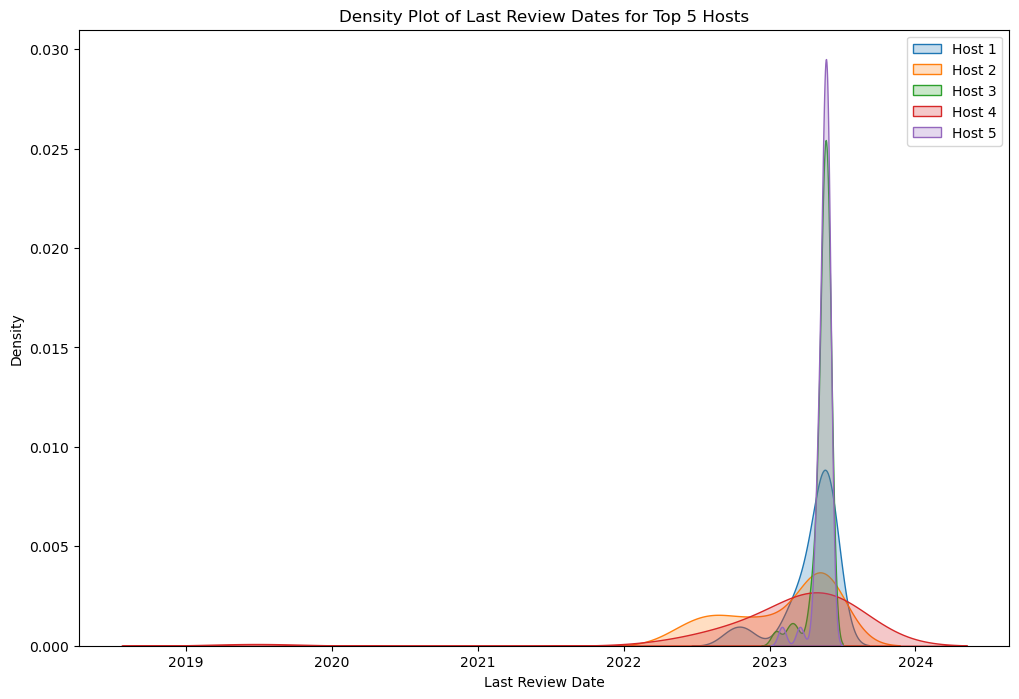

In [78]:
# Convert 'last_review' column to datetime data type
top_5_listings['last_review'] = pd.to_datetime(top_5_listings['last_review'])

# Create a KDE plot to visualize the distribution of 'last_review' dates for each top host
plt.figure(figsize=(12, 8))
for i, host_id in enumerate(top_5_hosts, start=1):
    sns.kdeplot(top_5_listings[top_5_listings['host_id'] == host_id]['last_review'], label=f'Host {i}', fill=True)
plt.xlabel('Last Review Date')
plt.ylabel('Density')
plt.title('Density Plot of Last Review Dates for Top 5 Hosts')
plt.legend()
plt.show()

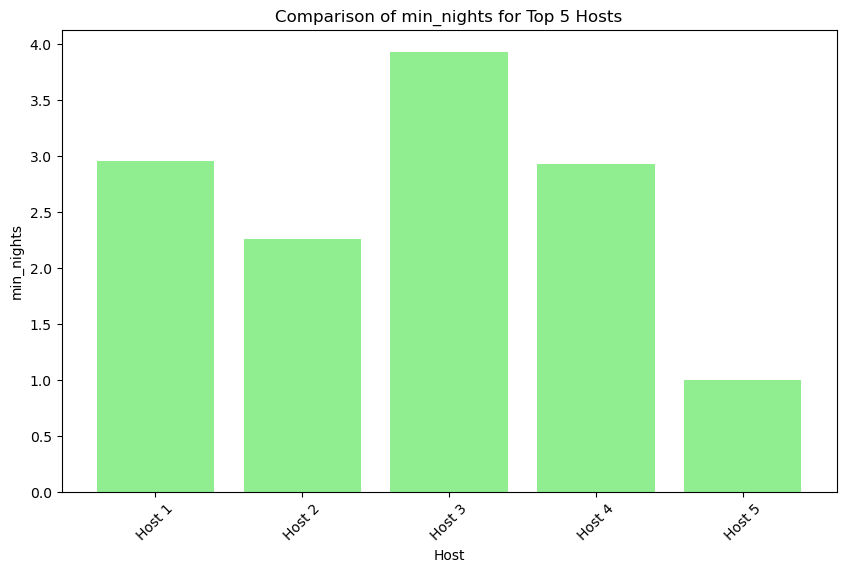

In [81]:
# Compare their prices visually using a bar plot
plt.figure(figsize=(10, 6))
top_5_prices = top_5_listings.groupby('host_id')['min_nights'].mean()
plt.bar([f'Host {i}' for i in range(1, 6)], top_5_prices, color='lightgreen')
plt.xlabel('Host')
plt.ylabel('min_nights')
plt.title('Comparison of min_nights for Top 5 Hosts')
plt.xticks(rotation=45)
plt.show()

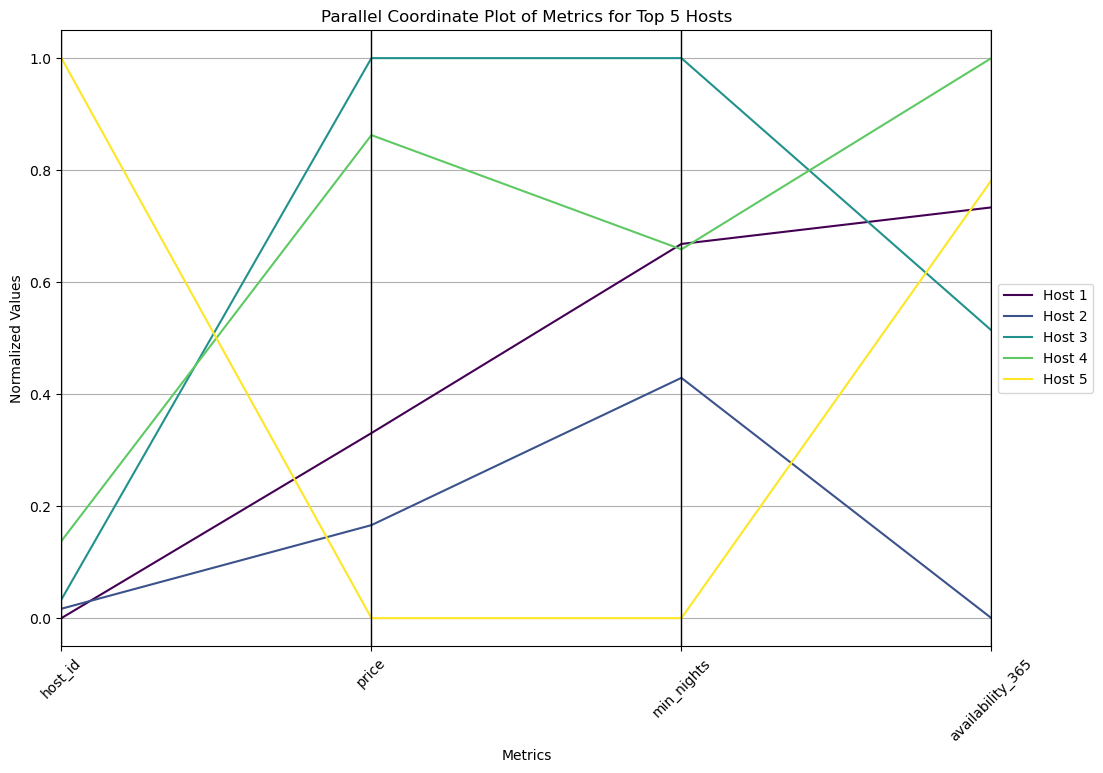

In [84]:
top_5_hosts = df_rome.groupby('host_id')['calculated_host_listings_count'].sum().nlargest(5).index

# Filter the DataFrame to include only listings from the top 5 hosts
top_5_listings = df_rome[df_rome['host_id'].isin(top_5_hosts)]

# Group by host_id and calculate the mean of prices, min_nights, and availability_365
top_5_metrics = top_5_listings.groupby('host_id').agg({
    'price': 'mean',
    'min_nights': 'mean',
    'availability_365': 'mean'
}).reset_index()

# Normalize the data
normalized_top_5_metrics = (top_5_metrics - top_5_metrics.min()) / (top_5_metrics.max() - top_5_metrics.min())

# Add host labels
normalized_top_5_metrics['Host'] = ['Host 1', 'Host 2', 'Host 3', 'Host 4', 'Host 5']

# Plotting
plt.figure(figsize=(12, 8))
parallel_coordinates(normalized_top_5_metrics, class_column='Host', colormap='viridis')
plt.xlabel('Metrics')
plt.ylabel('Normalized Values')
plt.title('Parallel Coordinate Plot of Metrics for Top 5 Hosts')
plt.xticks(rotation=45)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()